# Data Exploration - Parks

### TO DO

- Park Sizes
- Park Entrances

In [1]:
import pandas as pd
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt
import area

%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
#Reading census tracts

ct = gp.GeoDataFrame.from_file('../data/nyct2010_15d/nyct2010.shp')
parks = gp.GeoDataFrame.from_file('../data/Parks Properties.geojson')

In [3]:
parks.head()

,borough,geometry,gispropnum,location,nys_assemb,nys_senate,shape_star,shape_stle,signname,typecatego,us_congres,waterfront
0,Q,(POLYGON ((-73.94806058617914 40.7558921243117...,Q104,"Queensboro Bridge, 41 Rd., 40 Ave. bet. The Ea...",37,12,903579.125015,7376.27166037,Queensbridge Park,Community Park,12,Yes
1,X,(POLYGON ((-73.78243845176834 40.8440889832097...,X253,City Island Ave bet. Centre St. and Winter St.,82,34,263831.264191,2635.6101749,Ambrosini Field,Recreation Field/Courts,14,Yes
2,Q,(POLYGON ((-73.83638471337609 40.5780595390408...,Q494,"Beach 116 St., Ocean Promenade",23,15,6547.11642456,403.979313682,Flight 587 Memorial Park,Triangle/Plaza,5,Yes
3,X,(POLYGON ((-73.87623969625956 40.8419878695552...,X245,E 180 St bet. the Bronx River and Devoe Av,87,33,20232.5918732,582.832404647,River Garden,Garden,15,Yes
4,Q,(POLYGON ((-73.93623823248323 40.7692821829763...,Q465,Vernon Blvd. bet. Broadway and 30 Dr.,37,12,199700.239243,3014.55804623,Socrates Sculpture Park,Neighborhood Park,12,Yes


In [4]:
parks.shape

(2001, 12)

In [47]:
#convert area to numeric values
parks['shape_star'] = pd.to_numeric(parks['shape_star'])

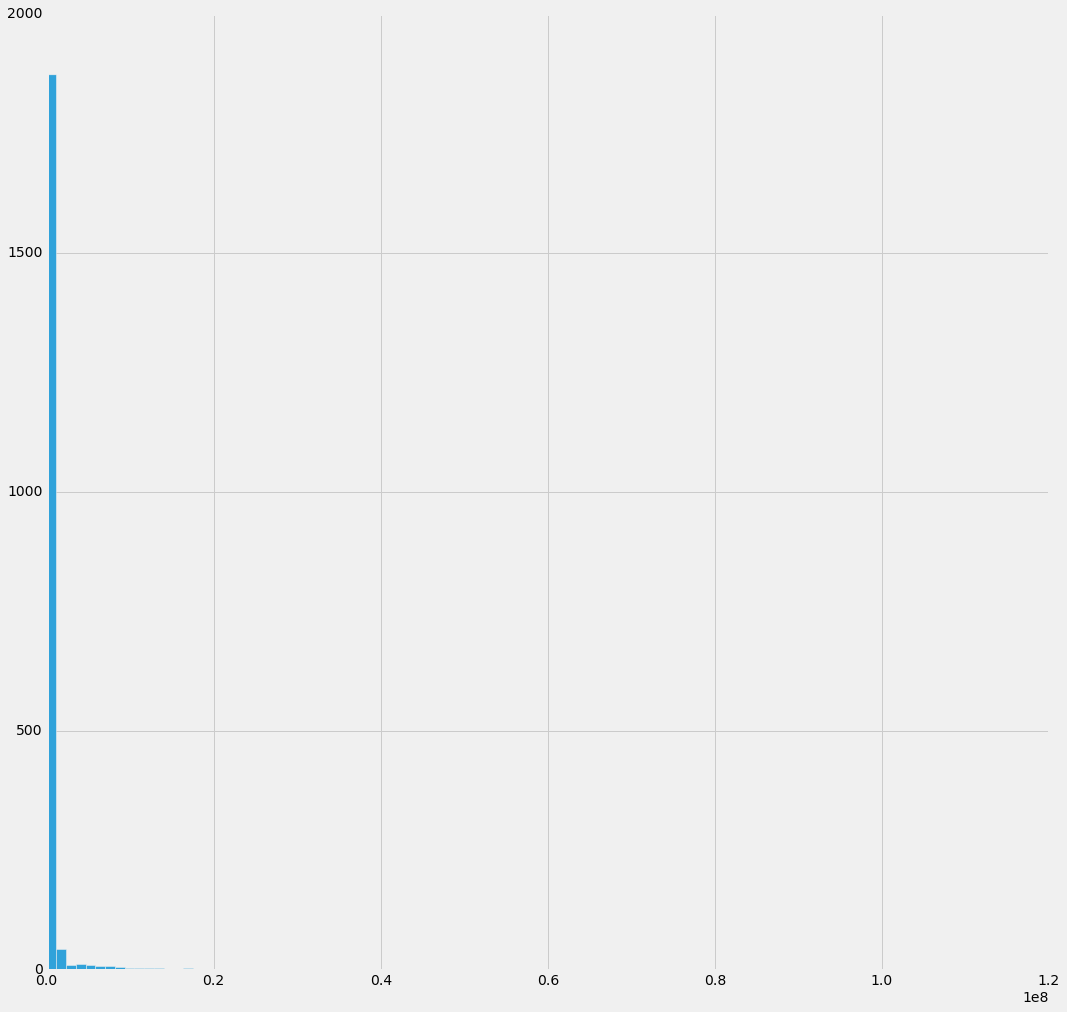

In [54]:
plt.figure(figsize=(16,16))
plt.hist(parks['shape_star'], bins=100);

In [55]:
parks['shape_star'].describe()

count    2.001000e+03
mean     6.196366e+05
std      3.932290e+06
min      2.600052e+01
25%      6.560821e+03
50%      3.239474e+04
75%      9.127998e+04
max      1.166864e+08
Name: shape_star, dtype: float64

In [57]:
parks[parks.shape_star == max(parks['shape_star'])]

,borough,geometry,gispropnum,location,nys_assemb,nys_senate,shape_star,shape_stle,signname,typecatego,us_congres,waterfront
1981,X,(POLYGON ((-73.80309100958441 40.8610301451117...,X039,"Hutchinson River, Long Island Sound bet. Bronc...",,,1.166864e+08,190344.122865,Pelham Bay Park,Flagship Park,,Yes


In [58]:
max(parks['shape_star'])

116686371.42299999

In [59]:
sorted_by_area = parks.sort(['shape_star'])

/Library/Python/2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [65]:
sorted_by_area.tail(10)

,borough,geometry,gispropnum,location,nys_assemb,nys_senate,shape_star,shape_stle,signname,typecatego,us_congres,waterfront
1999,Q,(POLYGON ((-73.74359032932369 40.7515402490324...,Q001,"Little Neck Bay, L.I.E., Union Tpk, bet. Sprin...","24, 25, 26","11, 16",2.665802e+07,99032.3727483,Alley Pond Park,Flagship Park,"3, 6",Yes
13,R,(POLYGON ((-74.07175700344443 40.5755440109400...,R046,"Ft. Wadsworth To Miller Field, Fr Capodanno Blvd.",64,"23, 24",2.806791e+07,32867.0062869,Franklin D. Roosevelt Boardwalk and Beach,Waterfront Facility,11,Yes
40,X,(POLYGON ((-73.87743299530526 40.8550632463419...,X002,"Burke Ave., E. 180 St. bet. Dr. Kazamiroff Blv...","78, 80, 87","36, 34, 33",2.838800e+07,77120.0148496,Bronx Park,Flagship Park,"15, 14",Yes
1998,M,(POLYGON ((-73.95773460653697 40.8002663404471...,M010,"5 Av To Central Park W, 59 St To 110 St","69, 68, 67, 75",29,3.656768e+07,33356.5443823,Central Park,Flagship Park,"10, 13",No
504,R,(POLYGON ((-74.14628466969384 40.5739732974793...,R013,"Forest Hill Rd., London Rd., Rockland Ave., Ar...",63,24,3.676336e+07,45236.1040225,LaTourette Park & Golf Course,Flagship Park,11,No
1988,B,(POLYGON ((-73.92159871579331 40.6073725617421...,B057,"Shore Pkwy., Avenue U, Filmore Ave. bet. Brigh...",59,22,3.791220e+07,81621.7099488,Marine Park,Community Park,"9, 8",Yes
1884,Q,(POLYGON ((-73.83749278564547 40.7541851050256...,Q099,"Grand Central Pkwy., Whitestone Exwy. bet. 111...","35, 25, 40","13, 15, 16",3.910247e+07,104456.440317,Flushing Meadows Corona Park,Flagship Park,"6, 14",Yes
1555,R,(POLYGON ((-74.16735131457781 40.5895298406544...,R017,"Victory Blvd., W. Shore Exwy., Richmond Ave. b...",63,24,3.978424e+07,74774.1341893,Freshkills Park,Undeveloped,11,Yes
1019,X,(POLYGON ((-73.88551901104849 40.8994769309089...,X092,"NYC - Westchester County Line, Van Cortlandt P...",81,34,4.691240e+07,110910.14527,Van Cortlandt Park,Flagship Park,16,No
1981,X,(POLYGON ((-73.80309100958441 40.8610301451117...,X039,"Hutchinson River, Long Island Sound bet. Bronc...",,,1.166864e+08,190344.122865,Pelham Bay Park,Flagship Park,,Yes


In [67]:
parks[parks['signname'] == "Central Park"]

,borough,geometry,gispropnum,location,nys_assemb,nys_senate,shape_star,shape_stle,signname,typecatego,us_congres,waterfront
1558,B,(POLYGON ((-73.96881026705009 40.6718894604611...,B073,"Prospect Park W, Parkside Ave. bet. Flatbush A...",44,21,2.085002e+07,19785.7019015,Prospect Park,Flagship Park,9,No


In [69]:
sorted_by_area.head(20)

,borough,geometry,gispropnum,location,nys_assemb,nys_senate,shape_star,shape_stle,signname,typecatego,us_congres,waterfront
1453,Q,(POLYGON ((-73.85900593218402 40.7076223384013...,Q409,Woodhaven Blvd. bet. 76 Ave. and 78 Ave.,28,15,26.000519,54.014023393,Park,Strip,6,No
1576,B,(POLYGON ((-73.96082329434076 40.6078492874322...,B094,"E. 12 St., Kings Hwy., Quentin Rd.",45,17,33.371048,34.2256444711,Sgt. Joyce Kilmer Triangle,Triangle/Plaza,11,No
1596,Q,(POLYGON ((-73.87499097914227 40.7303711869379...,Q360W,LIE Srv. Rd. S. at 86 St.,30,16,50.500046,50.3924688617,Park,Strip,6,No
1067,Q,(POLYGON ((-73.90241204737784 40.7185830220212...,Q063,"Fresh Pond Rd., 59 Rd. and 61 St.",30,15,72.665115,42.3780565583,Luke J. Lang Square,Triangle/Plaza,6,No
1117,B,(POLYGON ((-74.02065160817062 40.6380710494081...,B210N,4 Ave. bet. BQE and 64 St.,51,23,91.176727,178.834931694,Park,Strip,10,No
1068,B,(POLYGON ((-74.02691153290094 40.6164844833280...,B210U,92 St. bet. Gowanus Exwy. and Ft. Hamilton Pkwy.,46,22,95.066299,192.141336738,Park,Strip,11,No
1675,Q,(POLYGON ((-73.87503119179198 40.7309762999148...,Q360V,"Van Horn St. at 59 Ave., LIE",35,16,100.518021,107.281020424,Park,Strip,6,No
1318,B,(POLYGON ((-73.99321335460847 40.6653417041333...,B255A,Prospect Exwy. bet. 3 Ave. and 4 Ave.,51,20,101.421112,1127.39832003,Park,Strip,7,No
1692,Q,(POLYGON ((-73.87502053287329 40.7413186283481...,Q069,"Corona Ave., 90 St., 48 Ave.",35,16,102.949249,52.7775909837,Middleburgh Triangle,Triangle/Plaza,6,No
1595,Q,(POLYGON ((-73.88979677073561 40.7258917497359...,Q360Y2,Behind overpass at 58 Rd. and LIE Sr. Rd. S.,30,15,105.317368,192.164524493,Park,Strip,6,No


In [ ]:
## Is Location entrance 